In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
import os
from PIL import Image
import shutil

In [4]:
df = pd.read_csv('/Users/saravaz/Downloads/Project_raw_data/full_df.csv')

In [5]:
len(df)

6392

In [6]:
df.head(20)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
5,6,60,Male,6_left.jpg,6_right.jpg,macular epiretinal membrane,moderate non proliferative retinopathy，epireti...,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",6_right.jpg
6,7,60,Female,7_left.jpg,7_right.jpg,drusen,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",7_right.jpg
7,8,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",8_right.jpg
8,9,54,Male,9_left.jpg,9_right.jpg,normal fundus,vitreous degeneration,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['O'],"[0, 0, 0, 0, 0, 0, 0, 1]",9_right.jpg
9,10,70,Male,10_left.jpg,10_right.jpg,epiretinal membrane,normal fundus,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",10_right.jpg


In [7]:
df[['ID','labels','filename']].head()

,ID,labels,filename
0,0,['N'],0_right.jpg
1,1,['N'],1_right.jpg
2,2,['D'],2_right.jpg
3,4,['D'],4_right.jpg
4,5,['D'],5_right.jpg


In [8]:
df['labels'].value_counts()

['N']    2873
['D']    1608
['O']     708
['C']     293
['G']     284
['A']     266
['M']     232
['H']     128
Name: labels, dtype: int64

In [11]:
image = Image.open('/Users/saravaz/Downloads/Project_raw_data/preprocessed_images/4_left.jpg')
image_array = np.asarray(image)

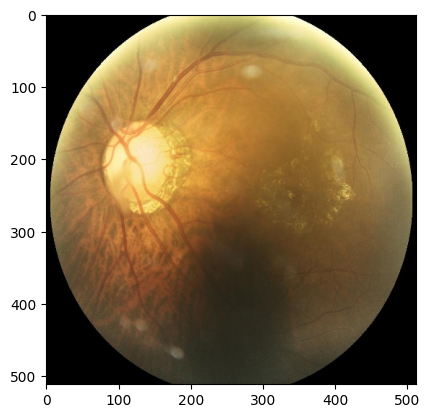

In [12]:
plt.imshow(image_array);

In [17]:
image_folder = '/Users/saravaz/Downloads/Project_raw_data/preprocessed_images/'

# create an empty list to hold the image data
image_data = []

# iterate through each image file in the folder
for filename in os.listdir(image_folder):
    # open the image file
    img = Image.open(os.path.join(image_folder, filename))
    # convert the image to a numpy array
    img_array = np.array(img)
    # append the image array to the list
    image_data.append(img_array)

In [18]:
type(image_data)

list

In [19]:
len(image_data)

6392

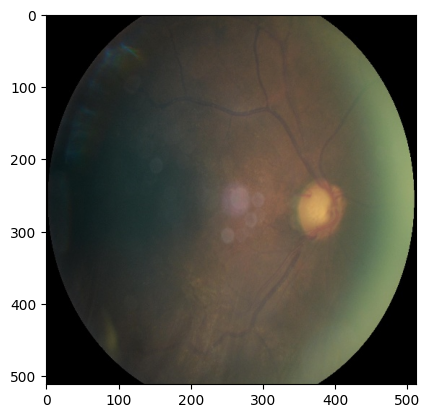

In [20]:
plt.imshow(image_data[18]);

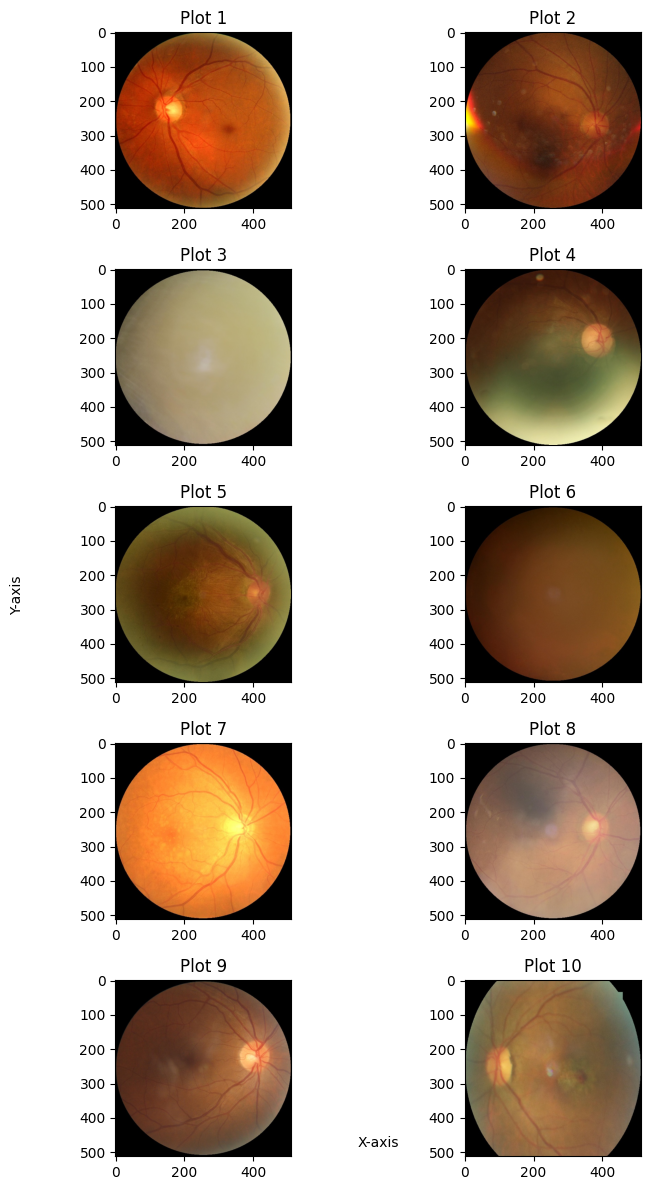

In [26]:
# Create a figure with 5 rows and 2 columns of subplots
fig, axs = plt.subplots(5, 2, figsize=(8, 12))

# Loop through all subplots and plot the corresponding image
for i, ax in enumerate(axs.flat):
    if i < 10:  # We have only 10 images to plot
        ax.imshow(image_data[i])
        ax.set_title(f"Plot {i+1}")  # Set subplot title

# Add a common x-label and y-label for all subplots
fig.text(0.5, 0.04, 'X-axis', ha='center')
fig.text(0.04, 0.5, 'Y-axis', va='center', rotation='vertical')

# Adjust the spacing between subplots to avoid overlap
fig.tight_layout()

# Show the figure
plt.show()
#This code will generate a figure with 10 subplots arranged in a 5x2 grid, each showing the sine wave. You can modify the code to plot your own data in each subplot and adjust the figure size and spacing according to your requirements.


In [27]:
X = image_data

In [30]:
def bin_class(label):
    if label == "['N']":
        return 0
    else:
        return 1

# aplicar a função à coluna idade e adicionar os resultados a uma nova coluna chamada maioridade
df['binary'] = df['labels'].apply(lambda x: bin_class(x))

In [32]:
df.head(20)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename,binary
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg,1
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg,1
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg,1
5,6,60,Male,6_left.jpg,6_right.jpg,macular epiretinal membrane,moderate non proliferative retinopathy，epireti...,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",6_right.jpg,1
6,7,60,Female,7_left.jpg,7_right.jpg,drusen,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",7_right.jpg,1
7,8,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",8_right.jpg,0
8,9,54,Male,9_left.jpg,9_right.jpg,normal fundus,vitreous degeneration,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['O'],"[0, 0, 0, 0, 0, 0, 0, 1]",9_right.jpg,1
9,10,70,Male,10_left.jpg,10_right.jpg,epiretinal membrane,normal fundus,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",10_right.jpg,0


In [28]:
"""def read_image(filename):
    img_path = os.path.join('/Users/saravaz/Downloads/Project_raw_data/preprocessed_images/', filename)
    img = Image.open(img_path)
    return img"""

In [ ]:
"""for index, row in df.iterrows():
    img_name = row['filename']
    img = read_image(img_name)"""
    

In [35]:
source = "/Users/saravaz/Downloads/Project_raw_data/preprocessed_images/"
dest = "/Users/saravaz/Downloads/Project_raw_data/data_SV/" 

for _, row in df.iterrows():
    source_file = os.path.join(source,row['filename'])
    dest_file = os.path.join(dest,str(row['binary']), row['filename'])
    shutil.copy(source_file, dest_file)